In [1]:
#STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score


In [2]:
#STEP 2: Create Sample Data
np.random.seed(42)
n = 1000  # number of applicants

# Create synthetic financial features
age = np.random.randint(21, 65, size=n)
income = np.random.normal(50000, 15000, size=n).astype(int)
debt = np.random.normal(15000, 5000, size=n).astype(int)
payment_history = np.random.randint(0, 5, size=n)
credit_utilization = np.round(np.random.uniform(0.1, 0.9, size=n), 2)

In [3]:
#Create the Target Variable (Default = 1, No Default = 0)
default = (
    (debt > 18000).astype(int) +
    (payment_history > 2).astype(int) +
    (credit_utilization > 0.7).astype(int)
)
default = (default > 1).astype(int)

In [4]:
#STEP 4: Combine All Into a DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Debt': debt,
    'Payment_History': payment_history,
    'Credit_Utilization': credit_utilization,
    'Default': default
})

df['Debt_to_Income'] = (df['Debt'] / df['Income']).round(2)
print("\n Sample Data:\n", df.head())


 Sample Data:
    Age  Income   Debt  Payment_History  Credit_Utilization  Default  \
0   59   36727  15399                2                0.42        0   
1   49   54304  16739                3                0.68        0   
2   35   52477  10957                2                0.72        0   
3   63   58534  13423                3                0.19        0   
4   28   36877  12866                3                0.10        0   

   Debt_to_Income  
0            0.42  
1            0.31  
2            0.21  
3            0.23  
4            0.35  


In [5]:
#STEP 5: Prepare Features and Target
X = df[['Income', 'Debt_to_Income', 'Credit_Utilization', 'Payment_History']]
y = df['Default']

In [6]:
#STEP 6: Split Data (Train & Test Sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#STEP 7: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
#STEP 8: Make Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [9]:
#STEP 9: Evaluate the Model
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\n ROC-AUC Score: {roc_auc:.2f}")


 Confusion Matrix:
 [[155   7]
 [ 18  20]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       162
           1       0.74      0.53      0.62        38

    accuracy                           0.88       200
   macro avg       0.82      0.74      0.77       200
weighted avg       0.87      0.88      0.87       200


 ROC-AUC Score: 0.88


In [10]:
#STEP 10: View Feature Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("\n Feature Coefficients:\n", coefficients)


 Feature Coefficients:
               Feature  Coefficient
0              Income     0.000008
1      Debt_to_Income     2.123920
2  Credit_Utilization     5.143795
3     Payment_History     0.804014


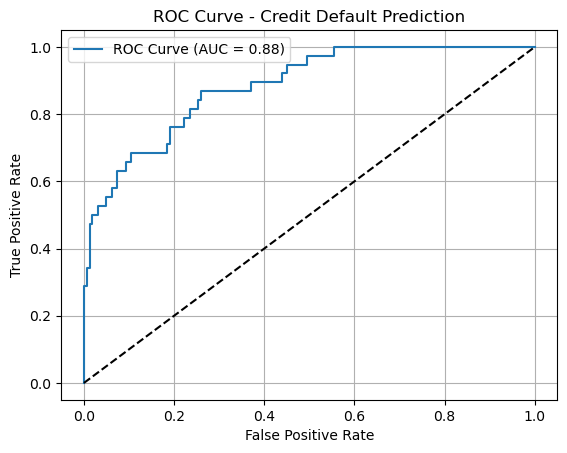

In [11]:
#STEP 11: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Default Prediction")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
#STEP 12: Train Random Forest Model (New Addition)
from sklearn.ensemble import RandomForestClassifier

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [13]:
#STEP 13: Make Predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [14]:
#STEP 14: Evaluate Random Forest Model
print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"\nROC-AUC Score (Random Forest): {roc_auc_rf:.2f}")


Confusion Matrix (Random Forest):
 [[160   2]
 [  1  37]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       162
           1       0.95      0.97      0.96        38

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.99      0.98      0.99       200


ROC-AUC Score (Random Forest): 1.00


In [15]:
#STEP 15: Compare Both Models (Logistic vs Random Forest)
# Compare performance
roc_auc_lr = roc_auc_score(y_test, y_proba)
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "ROC-AUC": [roc_auc_lr, roc_auc_rf]
})

print("\nModel Comparison:\n", comparison)


Model Comparison:
                  Model   ROC-AUC
0  Logistic Regression  0.883528
1        Random Forest  0.998213


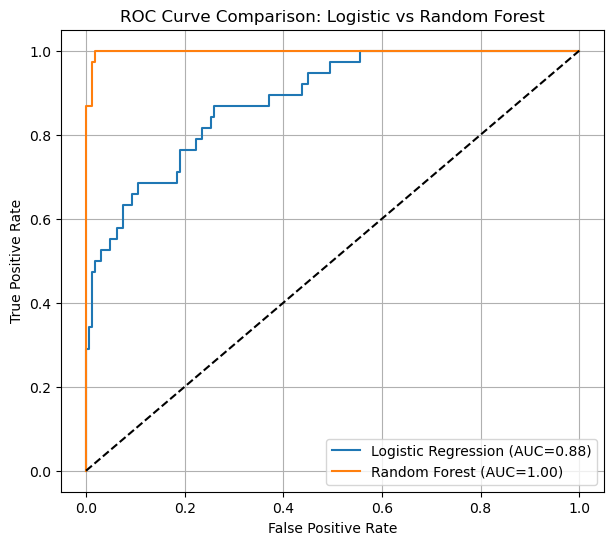

In [16]:
#STEP 16: Visual Comparison — ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_rf:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Logistic vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()